Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Load DataSet

In [2]:
t_data = pd.read_csv('/content/tested.csv')
t_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Basic Information of Dataset

In [3]:

#Basic Information of dataset
t_data.info()
print("\n")

#Number of rows and columns in dataset
print(t_data.shape)
print("\n")

#Check number of missing values in each column
print('No of missing values:',t_data.isnull().sum())
print("\n")

#For staistical measures
print(t_data.describe())
print("\n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


(418, 12)


No of missing values: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327

Exploratory Data Analysis

No of Survivals 0    266
1    152
Name: Survived, dtype: int64




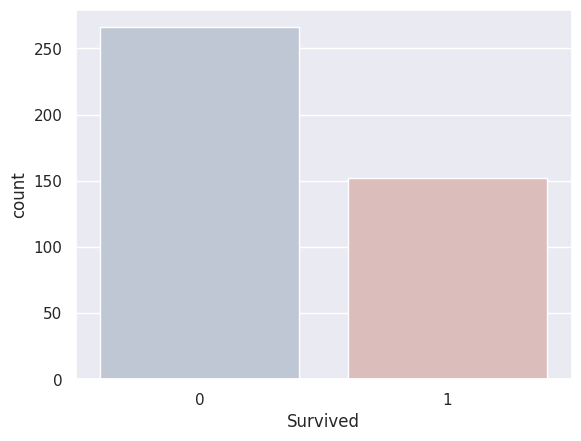

In [4]:
#Data visualization
sns.set()
print('No of Survivals',t_data['Survived'].value_counts())
sns.countplot(x='Survived', data=t_data, palette= "vlag")
print("\n")

Sex male      266
female    152
Name: Sex, dtype: int64




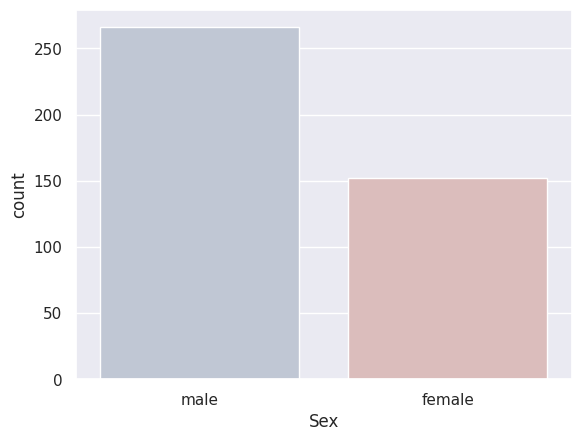

In [5]:
#Data visualization for sex column
print('Sex',t_data['Sex'].value_counts())
sns.countplot(x='Sex', data=t_data, palette= "vlag")
print("\n")

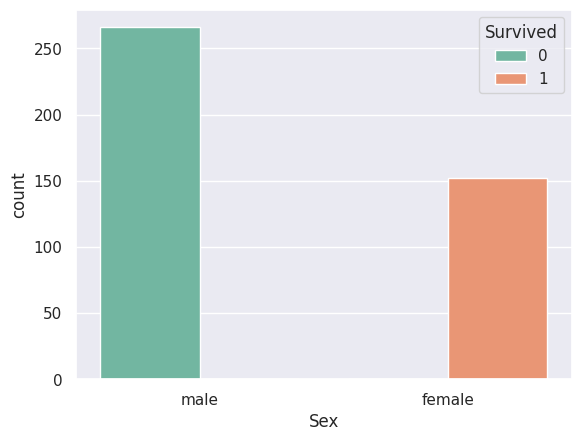

In [6]:
#Data visualization for survival based on sex column
sns.set()
sns.countplot(x='Sex', hue='Survived', data=t_data, palette= "Set2")
print("\n")

Pclass: 3    218
1    107
2     93
Name: Pclass, dtype: int64




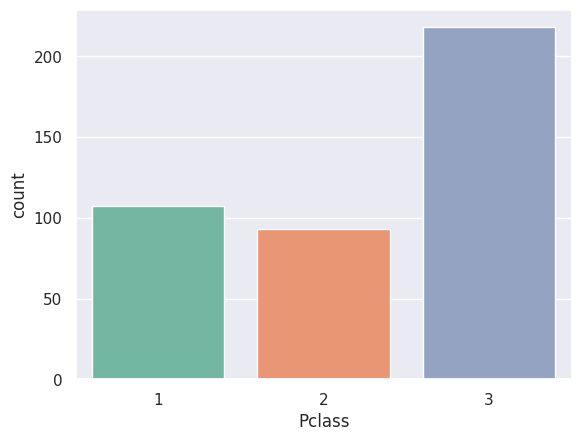

In [7]:
#Data visualization for Pclass
print('Pclass:',t_data['Pclass'].value_counts())
sns.countplot(x='Pclass', data=t_data, palette= "Set2")
print("\n")

Pclass: 3    218
1    107
2     93
Name: Pclass, dtype: int64




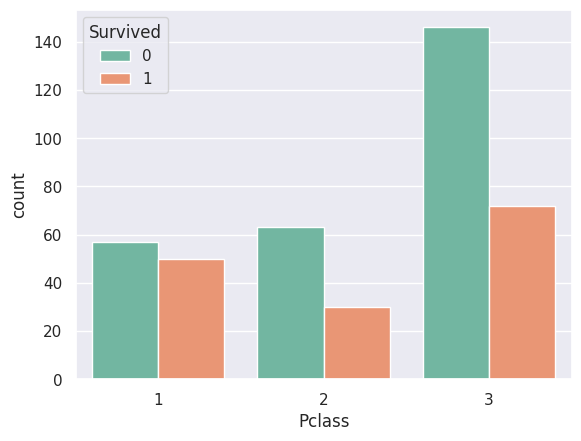

In [8]:
#Data visualization for Survivals based on Pclass
print('Pclass:',t_data['Pclass'].value_counts())
sns.countplot(x='Pclass', hue='Survived', data=t_data, palette= "Set2")
print("\n")

Cleaning and Preprocessing of Dataset

In [9]:
#handling missing values
t_data['Age'].fillna(t_data['Age'].median(), inplace=True)
t_data['Embarked'].fillna(t_data['Embarked'].mode()[0], inplace=True)
t_data['Fare'].fillna(t_data['Fare'].mode()[0], inplace=True)
t_data['Cabin'].fillna(t_data['Cabin'].mode()[0], inplace=True)

# Convert categorical features to numerical
encoder = LabelEncoder()
t_data['Sex'] = encoder.fit_transform(t_data['Sex'])
t_data['Embarked'] = encoder.fit_transform(t_data['Embarked'])
t_data['Cabin'] = encoder.fit_transform(t_data['Cabin'])

#Select relevant features for training of model
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = t_data[features]
y = t_data['Survived']
print (X)
print(y)

     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
0         3    1  34.5      0      0    7.8292         1
1         3    0  47.0      1      0    7.0000         2
2         2    1  62.0      0      0    9.6875         1
3         3    1  27.0      0      0    8.6625         2
4         3    0  22.0      1      1   12.2875         2
..      ...  ...   ...    ...    ...       ...       ...
413       3    1  27.0      0      0    8.0500         2
414       1    0  39.0      0      0  108.9000         0
415       3    1  38.5      0      0    7.2500         2
416       3    1  27.0      0      0    8.0500         2
417       3    1  27.0      1      1   22.3583         0

[418 rows x 7 columns]
0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


Splitting dataset into train and test sets

In [10]:
#Split the data into traing and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train models

In [11]:
#Train Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
print("\n")

#Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(random_state=42)

Evaluate Models

In [12]:
#predictions on Logistic regression
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)*100
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f'Logistic Regression Accuracy: {accuracy:.2f}')
print("\n")
print("Confusion Matrix:\n", conf_matrix)
print("\n")
print("Classification Report:\n", classification_rep)
print("\n")

#predictions on random forest
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Random Forest Accuracy: {accuracy:.2f}')
print("\n")
print("Confusion Matrix:\n", conf_matrix)
print("\n")
print("Classification Report:\n", classification_rep)

Logistic Regression Accuracy: 100.00


Confusion Matrix:
 [[50  0]
 [ 0 34]]


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



Random Forest Accuracy: 1.00


Confusion Matrix:
 [[50  0]
 [ 0 34]]


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

